In [18]:
# Import the important library for data preprocessing, Input-Output of dataset and data visualization
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans

## 2. Loading data in Pandas Dataframe :

In [19]:
df = pd.read_csv('Iris.csv').drop("Id", axis=1)
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [20]:
df.shape

(150, 5)

In [21]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='SepalLengthCm'>

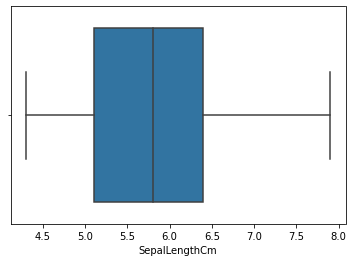

In [23]:
sns.boxplot(df.SepalLengthCm)


<AxesSubplot:xlabel='SepalWidthCm'>

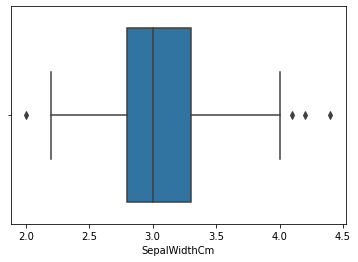

In [24]:
sns.boxplot(df.SepalWidthCm)


<AxesSubplot:>

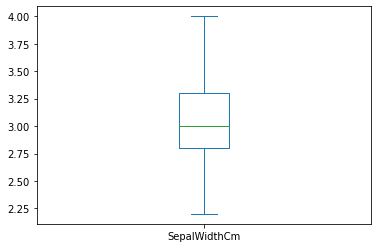

In [25]:
# Treat

df = df[df.SepalWidthCm <= 4]
df =df[df.SepalWidthCm > 2]

df['SepalWidthCm'].plot(kind='box')

In [26]:
sns.boxplot(df.PetalLengthCm)


<AxesSubplot:xlabel='PetalLengthCm'>

In [27]:
sns.boxplot(df.PetalWidthCm)


<AxesSubplot:xlabel='PetalWidthCm'>

There are no outliers

## 3. Plotting Graph :

In [28]:
X = np.random.uniform(0,1,50)
Y = np.random.uniform(0,1,50)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y


<AxesSubplot:xlabel='X', ylabel='Y'>

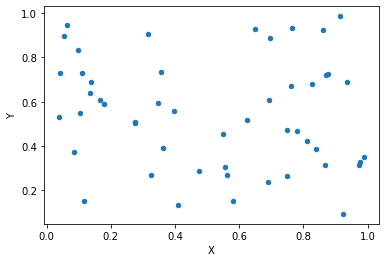

In [29]:
df_xy.plot(x="X", y="Y", kind = "scatter")


In [13]:
df = df.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
X = df.drop("Species",axis=1)
y  = df["Species"]

In [30]:
model1 = KMeans(n_clusters = 3).fit(df_xy)
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<AxesSubplot:xlabel='X', ylabel='Y'>

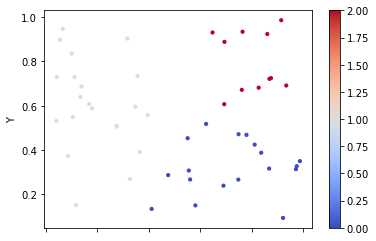

In [31]:
df_xy.plot(x = "X", y = "Y", c = model1.labels_, kind="scatter", s = 10, cmap = plt.cm.coolwarm)


In [32]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [38]:
df_norm = norm_func(df.iloc[:, 0:3])


In [39]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


Text(0, 0.5, 'total_within_SS')

In [41]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust'] = mb # creating a  new column and assigning it to new column 

df.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   clust  
0    2.0  
1    2.0  
2    2.0  
3    2.0  
4    2.0

In [43]:
df_norm.head()

df = df.iloc[:,[5,0,1,2,3,4]]
df.head()



clust  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0    2.0            5.1           3.5            1.4           0.2   
1    2.0            4.9           3.0            1.4           0.2   
2    2.0            4.7           3.2            1.3           0.2   
3    2.0            4.6           3.1            1.5           0.2   
4    2.0            5.0           3.6            1.4           0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [46]:
df.iloc[:, 2:5].groupby(df.clust).mean()

SepalWidthCm  PetalLengthCm  PetalWidthCm
clust                                           
0.0        2.855769       4.700000      1.517308
1.0        2.934783       4.919565      1.745652
2.0        3.363636       1.465909      0.247727